## Description for Prediction Notebook

Purpose
- Demonstrate how to use the saved model (optimized_gradient_boosting_model.pkl) to make predictions on test data.
- Evaluate the model's performance on unseen data using classification metrics such as precision, recall, F1-score, and ROC AUC.


### Loading the Saved Model and Data

- Load the pre-trained optimized Gradient Boosting model using joblib.
- Load the test dataset (test_data.pkl) and ensure the feature alignment between the training and test sets.

### Making Predictions

- Use the predict method to generate predictions for the test data (y_pred_test).
- Use the predict_proba method to calculate class probabilities (y_pred_proba_test).

### Evaluating Performance

- Generate a classification report showing precision, recall, F1-score, and support for each class (churned and non-churned customers).
- Calculate and display the ROC AUC score to assess the model's discriminatory power.

### Feature Alignment

- Ensure that the test dataset has the same features used during training (loaded_model.feature_names_in_).

In [12]:
import joblib
from sklearn.metrics import classification_report, roc_auc_score

# Load the saved model
loaded_model = joblib.load('optimized_gradient_boosting_model.pkl')

# Load the saved test data
X_test, y_test = joblib.load('test_data.pkl') 

# Align test features with training features
X_test = X_test[loaded_model.feature_names_in_]

# Make predictions
y_pred_test = loaded_model.predict(X_test)
y_pred_proba_test = loaded_model.predict_proba(X_test)[:, 1]

# Evaluate performance
print("Classification Report (Loaded Model):")
print(classification_report(y_test, y_pred_test))
print(f"ROC AUC Score (Loaded Model): {roc_auc_score(y_test, y_pred_proba_test):.2f}")


Classification Report (Loaded Model):
              precision    recall  f1-score   support

           0       0.96      0.91      0.93      1009
           1       0.79      0.90      0.84       400

    accuracy                           0.90      1409
   macro avg       0.88      0.90      0.89      1409
weighted avg       0.91      0.90      0.91      1409

ROC AUC Score (Loaded Model): 0.97


##### ROC AUC Score: Quantifies the model's ability to distinguish between churned and non-churned customers.

## Insights from Evaluation Metrics

- The recall of 0.90 for churned customers indicates the model captures 90% of customers likely to churn, minimizing potential revenue loss.
- The precision of 0.79 ensures that most customers flagged as likely to churn are accurate, reducing unnecessary retention costs.
- A balanced F1-score of 0.84 highlights the model's ability to balance precision and recall effectively.


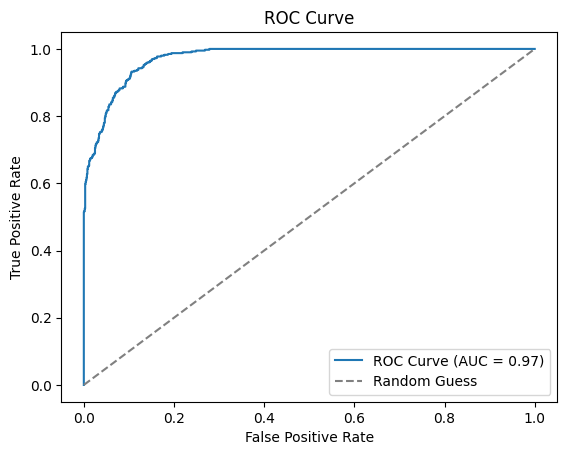

In [9]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(y_test, y_pred_proba_test)
plt.figure()
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc_score(y_test, y_pred_proba_test):.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


###### Feature Names:

Display the features used during training and testing to confirm alignment.

In [2]:
print("Training Features:", loaded_model.feature_names_in_)
print("Test Features:", X_test.columns.tolist())


Training Features: ['Churn Score' 'Avg Monthly Spend' 'Monthly Charges' 'Tenure Months']
Test Features: ['Churn Score', 'Avg Monthly Spend', 'Monthly Charges', 'Tenure Months']


In [3]:
pip install flask_ngrok

Note: you may need to restart the kernel to use updated packages.


In [4]:
import nest_asyncio
nest_asyncio.apply()


In [5]:
import joblib

model = joblib.load('optimized_gradient_boosting_model.pkl')
print("Model loaded successfully!")


Model loaded successfully!


In [6]:
import os
import sklearn

# Print the sklearn path
print(sklearn.__path__)

# List contents of the ensemble directory
ensemble_path = os.path.join(sklearn.__path__[0], 'ensemble')
print(os.listdir(ensemble_path))


['C:\\Users\\pinto\\anaconda3\\envs\\my_env\\Lib\\site-packages\\sklearn']
['meson.build', 'tests', '_bagging.py', '_base.py', '_forest.py', '_gb.py', '_gradient_boosting.cp311-win_amd64.lib', '_gradient_boosting.cp311-win_amd64.pyd', '_gradient_boosting.pyx', '_hist_gradient_boosting', '_iforest.py', '_stacking.py', '_voting.py', '_weight_boosting.py', '__init__.py', '__pycache__']


In [7]:
pip install flask flask-ngrok


Note: you may need to restart the kernel to use updated packages.


## Business Context

The usability of the trained model is demonstrated in a real-world scenario by evaluating its ability to predict customer churn on unseen data. This phase highlights the practical application of machine learning in addressing business challenges related to customer retention.

### Key Points

1. **Real-World Application**:
   - The trained model is applied to a test dataset to simulate its performance in predicting churn for actual customers.
   - This process ensures the model's robustness and readiness for deployment in a business environment.

2. **Stakeholder Confidence**:
   - The evaluation metrics, such as precision, recall, F1-score, and ROC AUC, provide a comprehensive understanding of the model's performance.
   - These metrics are critical for building trust among stakeholders, showcasing the model's capability to make accurate predictions.


In [15]:
import pandas as pd

metrics = {
    "Metric": ["Precision (Class 1)", "Recall (Class 1)", "F1-Score (Class 1)", "ROC AUC"],
    "Value": [0.79, 0.90, 0.84, 0.97]
}
metrics_df = pd.DataFrame(metrics)
print(metrics_df)


                Metric  Value
0  Precision (Class 1)   0.79
1     Recall (Class 1)   0.90
2   F1-Score (Class 1)   0.84
3              ROC AUC   0.97


3. **Importance of Precision and Recall**:
   - Precision and recall are emphasized, particularly for identifying high-risk churned customers who are crucial for retention efforts.
   - High precision ensures that the predicted churned customers are likely to churn, minimizing unnecessary retention costs.
   - High recall ensures that most actual churned customers are identified, reducing the risk of losing valuable customers.

By connecting these evaluation results to business objectives, this step bridges the gap between data science and actionable business strategies, helping stakeholders make informed decisions to reduce customer churn and improve retention strategies.


### Recommendations:
- Focus retention strategies on customers with high churn scores.
- Offer targeted promotions to customers in the first 12 months of their tenure.
- Monitor the performance of the deployed model regularly to ensure predictions remain accurate over time.


### Next Steps
- Deploying the model using Flask for real-time predictions.
- Integrate the prediction pipeline with a business dashboard to monitor churn risk in real-time.
- Retrain the model periodically with new customer data to maintain accuracy.
